# CITS4403: Computational Modelling - Group Project
## Corona Virus Outbreak - Dataset from Kaggle
### By Jayden Kur, 21988713
### Roarke, 21742366
### Andrew, 22246801

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

#from utils import decorate, savefig

# I set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

Reads in data from csv file

In [2]:
import pandas as pd
df = pd.read_csv("PatientInfo.csv", usecols = ['patient_id','sex','age','city','confirmed_date'])

In [3]:
df.head()

,patient_id,sex,age,city,confirmed_date
0,1000000001,male,50s,Gangseo-gu,23/1/20
1,1000000002,male,30s,Jungnang-gu,30/1/20
2,1000000003,male,50s,Jongno-gu,30/1/20
3,1000000004,male,20s,Mapo-gu,30/1/20
4,1000000005,female,20s,Seongbuk-gu,31/1/20


In [4]:
#Use patient_id as the index
df = df.set_index('patient_id')

In [5]:
df.head()

,sex,age,city,confirmed_date
patient_id,,,,
1000000001,male,50s,Gangseo-gu,23/1/20
1000000002,male,30s,Jungnang-gu,30/1/20
1000000003,male,50s,Jongno-gu,30/1/20
1000000004,male,20s,Mapo-gu,30/1/20
1000000005,female,20s,Seongbuk-gu,31/1/20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2771 entries, 1000000001 to 7000000009
Data columns (total 4 columns):
sex               2765 non-null object
age               2758 non-null object
city              2703 non-null object
confirmed_date    2771 non-null object
dtypes: object(4)
memory usage: 108.2+ KB


In [7]:
#Drop any row with null value
df = df.dropna(how='any',axis=0);
#Drop any row with 'city' = etc
df = df[~df.city.str.contains("etc")];

# Korea City info - https://www.kaggle.com/kimjihoo/coronavirusdataset/discussion/132763

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 1000000001 to 7000000009
Data columns (total 4 columns):
sex               2655 non-null object
age               2655 non-null object
city              2655 non-null object
confirmed_date    2655 non-null object
dtypes: object(4)
memory usage: 103.7+ KB


In [9]:
unique_cities = df.city.unique()

In [10]:
len(df.city.unique())

138

In [11]:
unique_cities.sort()

In [12]:
unique_cities

array(['Andong-si', 'Ansan-si', 'Anseong-si', 'Anyang-si', 'Asan-si',
       'Bonghwa-gun', 'Bucheon-si', 'Buk-gu', 'Bupyeong-gu',
       'Busanjin-gu', 'Buyeo-gun', 'Changnyeong-gun', 'Changwon-si',
       'Cheonan-si', 'Cheongdo-gun', 'Cheongju-si', 'Cheongsong-gun',
       'Chilgok-gun', 'Chuncheon-si', 'Chungju-si', 'Daedeok-gu',
       'Dalseo-gu', 'Dalseong-gun', 'Danyang-gun', 'Dobong-gu', 'Dong-gu',
       'Dongdaemun-gu', 'Dongjak-gu', 'Dongnae-gu', 'Eumseong-gun',
       'Eunpyeong-gu', 'Gangbuk-gu', 'Gangdong-gu', 'Gangnam-gu',
       'Gangneung-si', 'Gangseo-gu', 'Geochang-gun', 'Geoje-si',
       'Geumcheon-gu', 'Geumjeong-gu', 'Gijang-gun', 'Gimcheon-si',
       'Gimhae-si', 'Gimje-si', 'Gimpo-si', 'Goesan-gun', 'Goryeong-gun',
       'Goseong-gun', 'Goyang-si', 'Gumi-si', 'Gunpo-si', 'Gunsan-si',
       'Guri-si', 'Guro-gu', 'Gwacheon-si', 'Gwanak-gu', 'Gwangjin-gu',
       'Gwangju-si', 'Gwangmyeong-si', 'Gwangyang-si', 'Gyeongju-si',
       'Gyeongsan-si', 'Gyeryong-si

In [13]:
df.confirmed_date.unique()

array(['23/1/20', '30/1/20', '31/1/20', '5/2/20', '6/2/20', '16/2/20',
       '19/2/20', '20/2/20', '21/2/20', '22/2/20', '23/2/20', '26/2/20',
       '24/2/20', '25/2/20', '27/2/20', '28/2/20', '29/2/20', '1/3/20',
       '2/3/20', '4/3/20', '5/3/20', '6/3/20', '7/3/20', '8/3/20',
       '9/3/20', '10/3/20', '11/3/20', '12/3/20', '13/3/20', '14/3/20',
       '15/3/20', '16/3/20', '17/3/20', '18/3/20', '19/3/20', '20/3/20',
       '21/3/20', '22/3/20', '23/3/20', '24/3/20', '25/3/20', '26/3/20',
       '27/3/20', '28/3/20', '29/3/20', '3/3/20', '18/2/20', '26/1/20',
       '27/1/20', '1/2/20', '2/2/20', '9/2/20', '10/2/20', '30/3/20'],
      dtype=object)

In [14]:
len(df.confirmed_date.unique())

54

In [15]:
#df

In [16]:
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'], format='%d/%m/%y').dt.strftime('%m%d')

In [17]:
#df

### Can change the string below to format dates

In [18]:
#df = df[df['confirmed_date'] < '0230'] # this works for all except date_list in animation

In [148]:
graph = nx.Graph()
for city in unique_cities:
    graph.add_node(city)

In [149]:
def populate_graph(df):
    node_names = df['city'].value_counts().index.to_list()
    node_sizes = df['city'].value_counts().to_list()
    labels = {}
    for name,size in zip(node_names,node_sizes):
        labels[name] = name+ '\n' +str(size)
    node_size = [50*node_sizes[ii] for ii in range(len(node_names))]# MADE THIS 50 * COUNT as the values were too small to see
    return node_names,node_size,labels

In [150]:
node_names,node_size,labels = populate_graph(df)

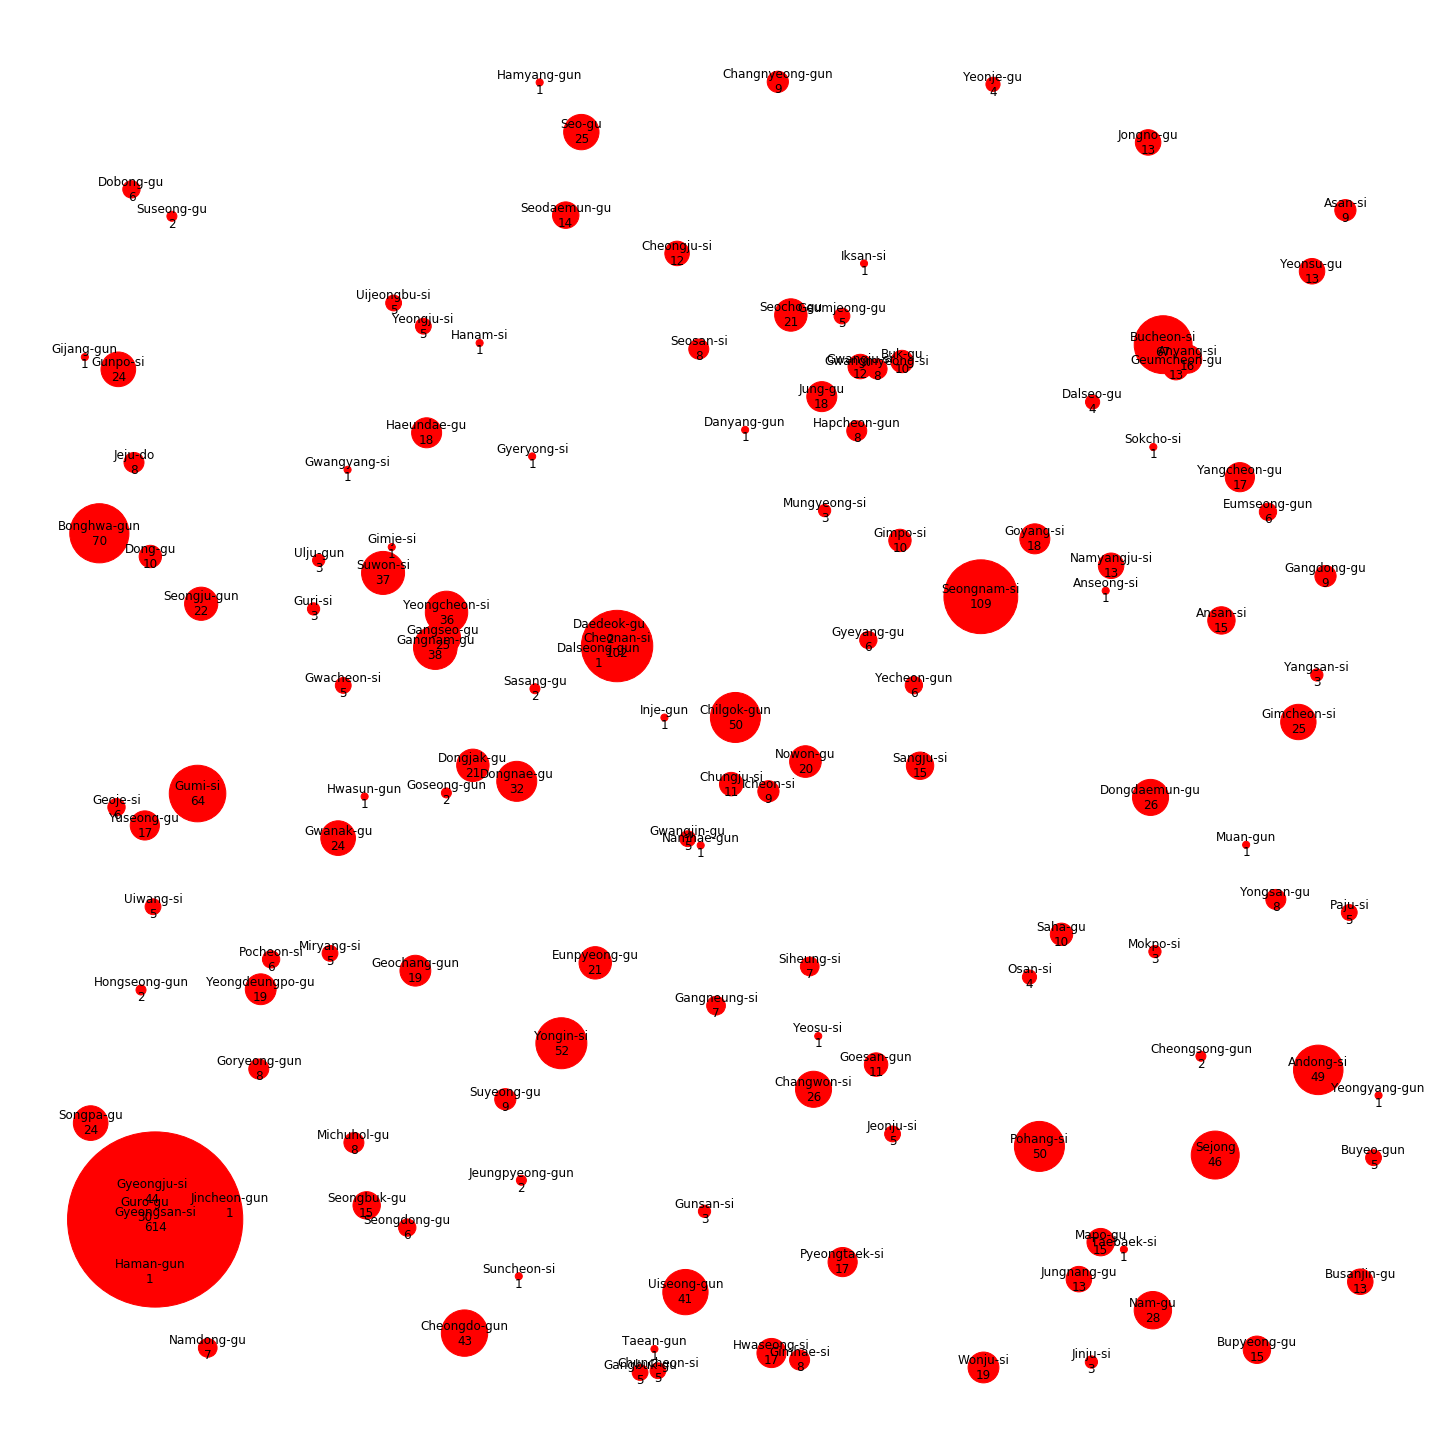

In [151]:
pos = nx.random_layout(graph)
plt.figure(1,figsize=(20,20)) 
nx.draw(graph,pos,nodelist=node_names,node_size=node_size,node_color='red',labels=labels,with_labels=True)
plt.axis('equal')
plt.show()

In [152]:
def get_cases():
    for ii in range(len(node_names)):
        attrs = {node_names[ii]: {'Cases': node_sizes[ii]}}
        nx.set_node_attributes(graph, attrs)
    return graph

In [153]:
graph = get_cases()

In [154]:
graph.nodes['Gyeongsan-si']['Cases']

614

In [155]:
new_df = df.set_index('city')

In [156]:
new_sort_df = new_df['sex'].sort_index()

In [157]:
def get_gender(new_sort_df):
    for ii in range(len(new_sort_df)):
        index_city = new_sort_df.index[ii]
        try:
            males = new_sort_df[index_city].value_counts()['male']
        except:
            males = 0
        try:
            females = new_sort_df[index_city].value_counts()['female']
        except:
            females = 0
        attrs = {index_city: {'Males': males, 'Females': females}}
        nx.set_node_attributes(graph, attrs)
    return graph

In [158]:
graph = get_gender(new_sort_df)
print(graph.nodes['Gyeongsan-si'])

{'Cases': 614, 'Males': 205, 'Females': 409}


In [159]:
new_sort_df = new_df['age'].sort_index()

In [160]:
def get_age_groups(new_sort_df):
    age_groups = list()
    for ii in range(len(new_sort_df)):
        index_city = new_sort_df.index[ii]
        try:
            zeroes = new_sort_df[index_city].value_counts()['0s']
        except:
            zeroes = 0
        try:
            tens = new_sort_df[index_city].value_counts()['10s']
        except:
            tens = 0
        try:
            twenties = new_sort_df[index_city].value_counts()['20s']
        except:
            twenties = 0
        try:
            thirties = new_sort_df[index_city].value_counts()['30s']
        except:
            thirties = 0
        try:
            fourties = new_sort_df[index_city].value_counts()['40s']
        except:
            fourties = 0
        try:
            fifties = new_sort_df[index_city].value_counts()['50s']
        except:
            fifties = 0
        try:
            sixties = new_sort_df[index_city].value_counts()['60s']
        except:
            sixties = 0
        try:
            seventies = new_sort_df[index_city].value_counts()['70s']
        except:
            seventies = 0
        try:
            eighties = new_sort_df[index_city].value_counts()['80s']
        except:
            eighties = 0
        try:
            nineties = new_sort_df[index_city].value_counts()['90s']
        except:
            nineties = 0
        #attrs = {index_city: {'Age Groups': [zeroes,tens,twenties,thirties,fourties,fifties,sixties,seventies,eighties,nineties]}}
        attrs = {index_city: {'Age Groups': {'0s':zeroes,'10s':tens,'20s':twenties,'30s':thirties,'40s':fourties,'50s':fifties,'60s':sixties,'70s':seventies,'80s':eighties,'90s':nineties}}}
        nx.set_node_attributes(graph, attrs)
    return graph

In [161]:
graph = get_age_groups(new_sort_df)
print(graph.nodes['Gyeongsan-si']['Age Groups']['10s'])
print(graph.nodes['Jungnang-gu'])
print(graph.nodes['Seongbuk-gu'])

24
{'Cases': 13, 'Males': 8, 'Females': 5, 'Age Groups': {'0s': 0, '10s': 1, '20s': 6, '30s': 2, '40s': 2, '50s': 1, '60s': 1, '70s': 0, '80s': 0, '90s': 0}}
{'Cases': 15, 'Males': 6, 'Females': 9, 'Age Groups': {'0s': 0, '10s': 0, '20s': 6, '30s': 2, '40s': 1, '50s': 4, '60s': 2, '70s': 0, '80s': 0, '90s': 0}}


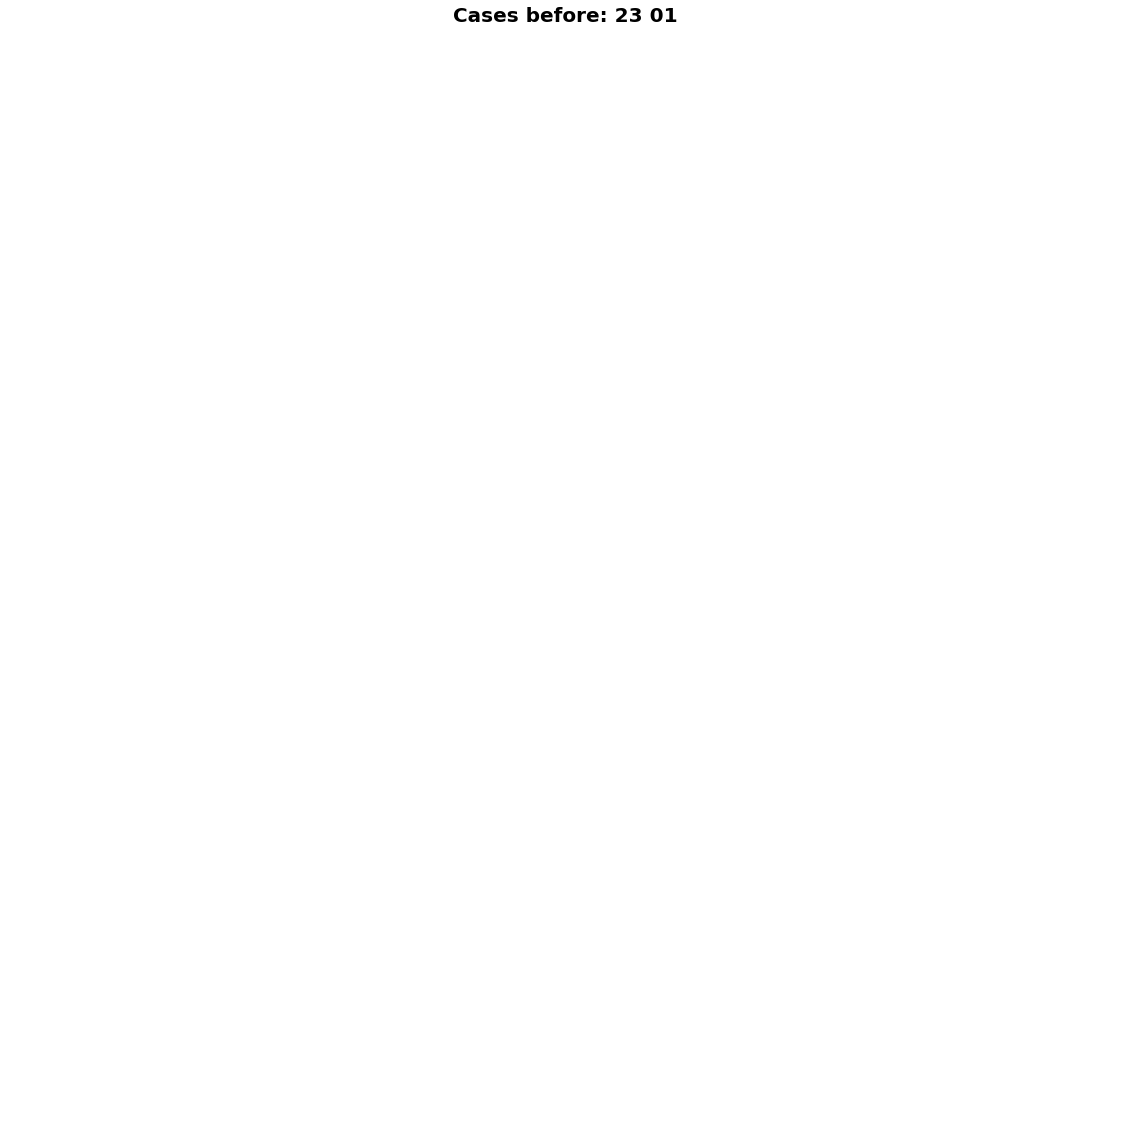

In [162]:
from matplotlib.animation import FuncAnimation
#date_list = ['0115','0125','0205','0215','0225','0305','0325','0405']
#date_list = ['0100','0105','0110','0115','0120','0125','0130',
#             '0205','0210','0215','0220','0225','0229', 
#             '0305','0310','0315','0320','0325','0330']
date_list = ['0123','0130',
             '0205','0210','0215','0220','0225','0229', 
             '0305','0310','0315','0320','0325','0330']
def animate(i):
    fig.clf() # Clears the axis each time
    ax = fig.add_subplot(111)
    #ax.set_aspect('equal')
    new_df = df.set_index('confirmed_date')
    new_df = new_df[new_df.index < date_list[i]]
    text = 'Cases before: ' + date_list[i][2:4] + ' '+ date_list[i][0:2]
    node_names = new_df['city'].value_counts().index.to_list()
    node_sizes = new_df['city'].value_counts().to_list()
    labels = {}
    for name,size in zip(node_names,node_sizes):
        labels[name] = name+ '\n' +str(size)
        
    node_size = [50*node_sizes[ii] for ii in range(len(node_names))]
    nx.draw(graph,pos,nodelist=node_names,node_size=node_size,node_color='red',labels=labels,with_labels=True)
    ax.set_title(text, fontsize=20, fontweight='bold')
    
fig = plt.figure(1,figsize=(20,20)) 

anim = FuncAnimation(fig, animate, frames=len(date_list), interval=600, repeat=True) # Animator call
anim.save('covid.gif', writer='imagemagick')

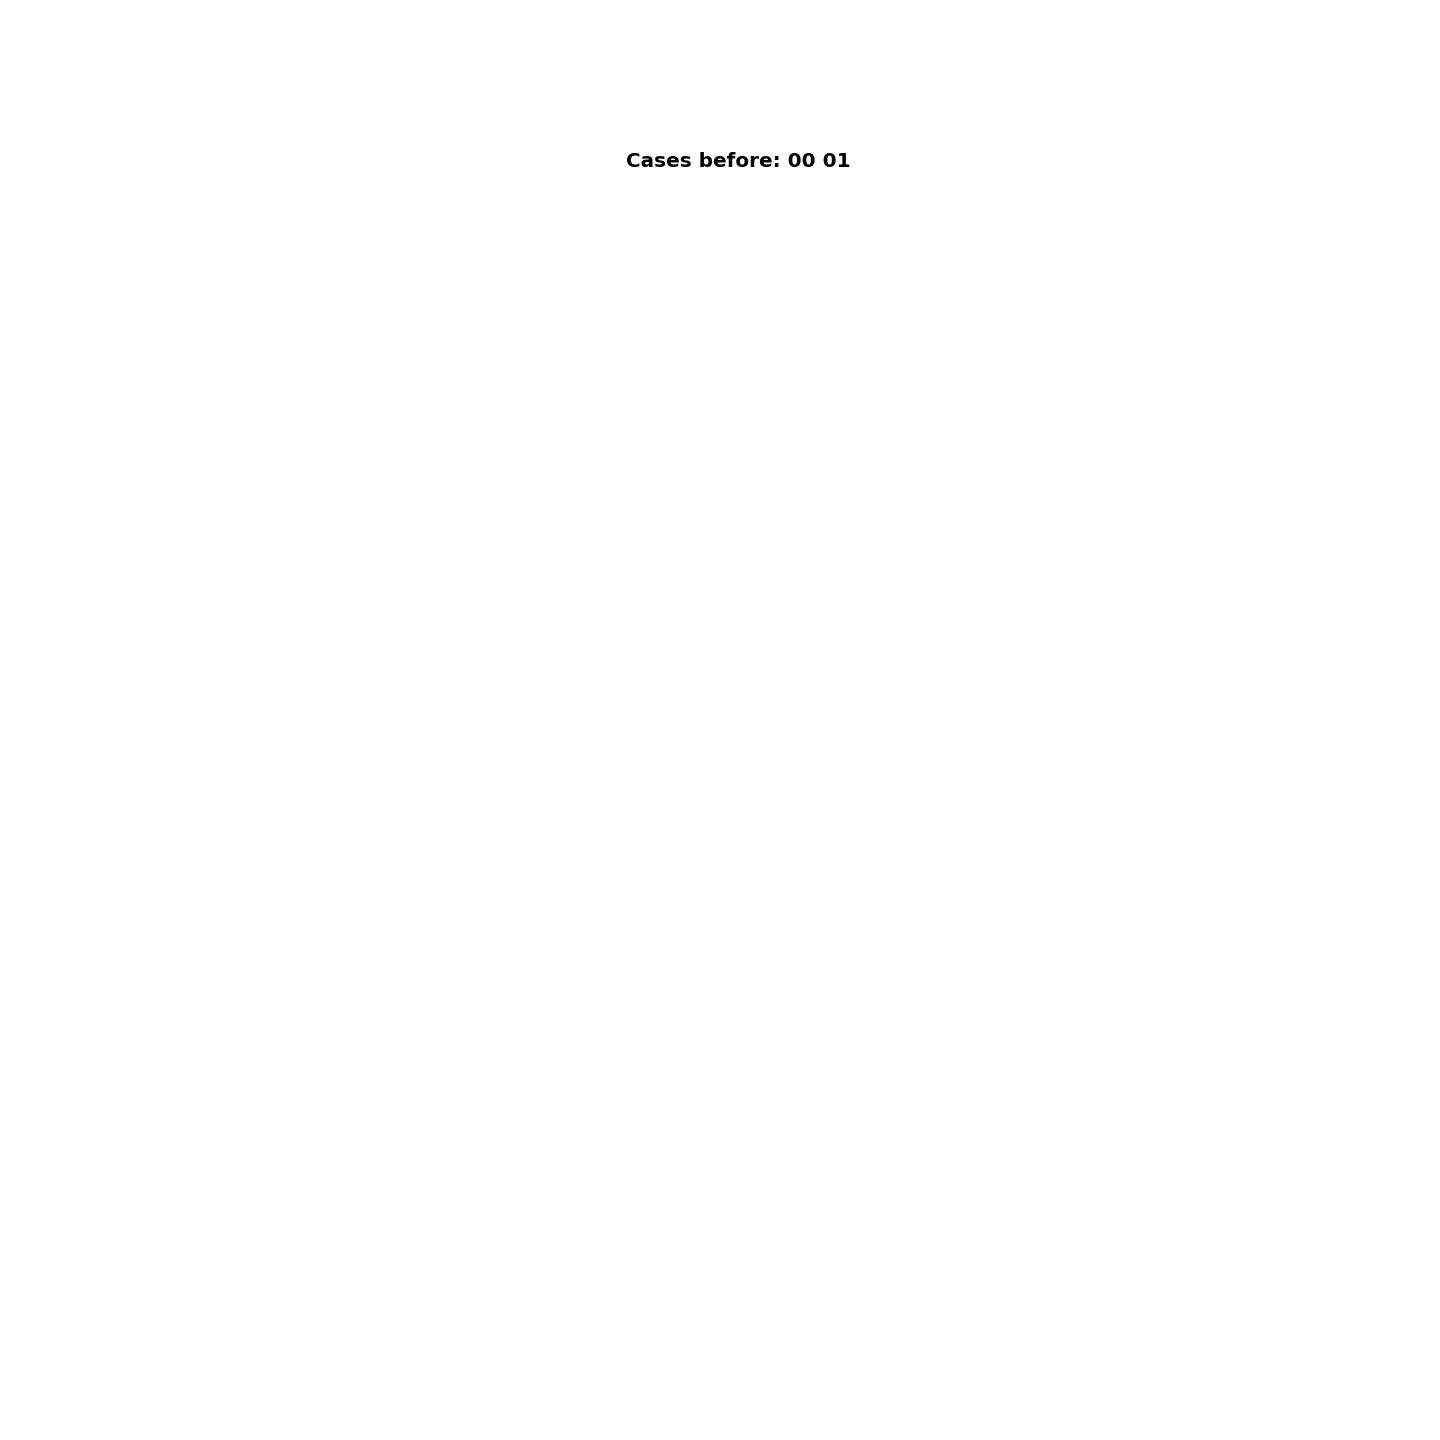

In [53]:
from IPython.display import Image
Image("covid.gif")

In [210]:
def city_printer():
    print('Cases by City:\n')
    for cities in graph.nodes:
        cases = graph.nodes[cities]['Cases']
        if(len(str(cities)) > 13): # FIXES BAD PRINTING
            tab = '\t'
        else:
            tab = '\t\t'
        print(str(cities)+':',tab,cases,('\t\t{0:.3%}').format(cases/total_cases),'of total cases')
    

In [211]:
# THIS LOOKS REALLY MESSY LOL
def age_group_printer():
    zeroes=tens=twenties=thirties=fourties=fifties=sixties=seventies=eighties=nineties = 0
    for cities in graph.nodes:
        zeroes += graph.nodes[cities]['Age Groups']['0s']
        tens += graph.nodes[cities]['Age Groups']['10s']
        twenties += graph.nodes[cities]['Age Groups']['20s']
        thirties += graph.nodes[cities]['Age Groups']['30s']
        fourties += graph.nodes[cities]['Age Groups']['40s']
        fifties += graph.nodes[cities]['Age Groups']['50s']
        sixties += graph.nodes[cities]['Age Groups']['60s']
        seventies += graph.nodes[cities]['Age Groups']['70s']
        eighties += graph.nodes[cities]['Age Groups']['80s']
        nineties += graph.nodes[cities]['Age Groups']['90s']
        
    print('\nCases by Age:\n')
    print('Zeroes:\t\t',zeroes,('\t\t{0:.3%}').format(zeroes/total_cases),'of total cases',
          '\nTens:\t\t',tens,('\t\t{0:.3%}').format(tens/total_cases),'of total cases',
          '\nTwenties:\t',twenties,('\t\t{0:.3%}').format(twenties/total_cases),'of total cases',
          '\nThirties:\t',thirties,('\t\t{0:.3%}').format(thirties/total_cases),'of total cases',
          '\nFourties:\t',fourties,('\t\t{0:.3%}').format(fourties/total_cases),'of total cases',
          '\nFifties:\t',fifties,('\t\t{0:.3%}').format(fifties/total_cases),'of total cases',
          '\nSixties:\t',sixties,('\t\t{0:.3%}').format(sixties/total_cases),'of total cases',
          '\nSeventies:\t',seventies,('\t\t{0:.3%}').format(seventies/total_cases),'of total cases',
          '\nEighties:\t',eighties,('\t\t{0:.3%}').format(eighties/total_cases),'of total cases',
          '\nNineties:\t',nineties,('\t\t{0:.3%}').format(nineties/total_cases),'of total cases')

In [212]:
def gender_printer():
    males=females=0
    for cities in graph.nodes:
        males += graph.nodes[cities]['Males']
        females += graph.nodes[cities]['Females']
    print('\nCases by Gender:\n')
    print('Males:\t\t',males,('\t\t{0:.3%}').format(males/total_cases),'of total cases',
          '\nFemales:\t',females,('\t\t{0:.3%}').format(females/total_cases),'of total cases')

In [213]:
graph.nodes['Andong-si']['Age Groups']['20s']

18

In [214]:
total_cases = 0
for cities in graph.nodes:
    total_cases += graph.nodes[cities]['Cases']
print('Total Cases:',total_cases)

Total Cases: 2655


In [215]:
city_printer()

Cases by City:

Andong-si: 		 49 		1.846% of total cases
Ansan-si: 		 15 		0.565% of total cases
Anseong-si: 		 1 		0.038% of total cases
Anyang-si: 		 16 		0.603% of total cases
Asan-si: 		 9 		0.339% of total cases
Bonghwa-gun: 		 70 		2.637% of total cases
Bucheon-si: 		 67 		2.524% of total cases
Buk-gu: 		 10 		0.377% of total cases
Bupyeong-gu: 		 15 		0.565% of total cases
Busanjin-gu: 		 13 		0.490% of total cases
Buyeo-gun: 		 5 		0.188% of total cases
Changnyeong-gun: 	 9 		0.339% of total cases
Changwon-si: 		 26 		0.979% of total cases
Cheonan-si: 		 102 		3.842% of total cases
Cheongdo-gun: 		 43 		1.620% of total cases
Cheongju-si: 		 12 		0.452% of total cases
Cheongsong-gun: 	 2 		0.075% of total cases
Chilgok-gun: 		 50 		1.883% of total cases
Chuncheon-si: 		 5 		0.188% of total cases
Chungju-si: 		 11 		0.414% of total cases
Daedeok-gu: 		 2 		0.075% of total cases
Dalseo-gu: 		 4 		0.151% of total cases
Dalseong-gun: 		 1 		0.038% of total cases
Danyang-gun: 		 1 		

In [40]:
age_group_printer()
gender_printer()


Cases by Age:

Zeroes:		 38 		1.431% of total cases 
Tens:		 115 		4.331% of total cases 
Twenties:	 626 		23.578% of total cases 
Thirties:	 331 		12.467% of total cases 
Fourties:	 378 		14.237% of total cases 
Fifties:	 504 		18.983% of total cases 
Sixties:	 319 		12.015% of total cases 
Seventies:	 151 		5.687% of total cases 
Eighties:	 129 		4.859% of total cases 
Nineties:	 41 		1.544% of total cases

Cases by Gender:

Males:		 1143 		43.051% of total cases 
Females:	 1490 		56.121% of total cases


In [253]:
def choose_dates(df,date_low,date_high):
    df_new = df[df['confirmed_date'] > date_low]
    df_new = df_new[df_new['confirmed_date'] < date_high]
    node_names,node_size,labels = populate_graph(df_new)
    graph = get_cases()
    return graph

In [264]:
def ave_growth_per_day(graph_2,date_low,date_high):
    date_diff = int(date_high) - int(date_low)
    print('Case growth per day from',date_low,'to',date_high,'('+str(date_diff),'days)\n')
    max_cases = 0
    max_city = ''
    temp = 0
    for cities in graph.nodes:
        cases = graph.nodes[cities]['Cases']
        temp = cases
        if (temp > max_cases):
            max_cases = temp
            max_city = cities
            temp = 0
        if(len(str(cities)) > 13): # FIXES BAD PRINTING
            tab = '\t'
        #elif(len(str(cities)) < 7):
        #    tab = '\t\t\t'
        else:
            tab = '\t\t'
        print(cities+':',tab,('{0:.3}').format(cases/date_diff))
    print('\nMax daily growth of',max_cases,'at',max_city)

In [265]:
graph_2 = choose_dates(df,'0210','0229')
days = ave_growth_per_day(graph_2,'0210','0229')

Case growth per day from 0210 to 0229 (19 days)

Andong-si: 		 2.58
Ansan-si: 		 0.789
Anseong-si: 		 0.0526
Anyang-si: 		 0.842
Asan-si: 		 0.474
Bonghwa-gun: 		 3.68
Bucheon-si: 		 3.53
Buk-gu: 		 0.526
Bupyeong-gu: 		 0.789
Busanjin-gu: 		 0.684
Buyeo-gun: 		 0.263
Changnyeong-gun: 	 0.474
Changwon-si: 		 1.37
Cheonan-si: 		 5.37
Cheongdo-gun: 		 2.26
Cheongju-si: 		 0.632
Cheongsong-gun: 	 0.105
Chilgok-gun: 		 2.63
Chuncheon-si: 		 0.263
Chungju-si: 		 0.579
Daedeok-gu: 		 0.105
Dalseo-gu: 		 0.211
Dalseong-gun: 		 0.0526
Danyang-gun: 		 0.0526
Dobong-gu: 		 0.316
Dong-gu: 		 0.526
Dongdaemun-gu: 		 1.37
Dongjak-gu: 		 1.11
Dongnae-gu: 		 1.68
Eumseong-gun: 		 0.316
Eunpyeong-gu: 		 1.11
Gangbuk-gu: 		 0.263
Gangdong-gu: 		 0.474
Gangnam-gu: 		 2.0
Gangneung-si: 		 0.368
Gangseo-gu: 		 1.32
Geochang-gun: 		 1.0
Geoje-si: 		 0.316
Geumcheon-gu: 		 0.684
Geumjeong-gu: 		 0.263
Gijang-gun: 		 0.0526
Gimcheon-si: 		 1.32
Gimhae-si: 		 0.421
Gimje-si: 		 0.0526
Gimpo-si: 		 0.526
Goesa

In [97]:
df_2 = pd.read_csv("PatientRoute.csv", usecols = ['patient_id','city','latitude','longitude'])

In [98]:
df_2.head()

,patient_id,city,latitude,longitude
0,1000000002,Gwangjin-gu,37.563992,127.029534
1,1000000002,Gangbuk-gu,37.592057,127.018898
2,1000000002,Gangbuk-gu,37.591669,127.018420
3,1000000002,Seongbuk-gu,37.606498,127.092761
4,1000000002,Seongbuk-gu,37.612772,127.098167


In [99]:
#Use patient_id as the index
df_2 = df_2.set_index('patient_id')

In [100]:
df_2.head()

,city,latitude,longitude
patient_id,,,
1000000002,Gwangjin-gu,37.563992,127.029534
1000000002,Gangbuk-gu,37.592057,127.018898
1000000002,Gangbuk-gu,37.591669,127.018420
1000000002,Seongbuk-gu,37.606498,127.092761
1000000002,Seongbuk-gu,37.612772,127.098167


In [101]:
#Drop any row with null value
df_2 = df_2.dropna(how='any',axis=0);

#Drop any row with 'city' = etc
df_2 = df_2[~df_2.city.str.contains("etc")];

In [102]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 1000000002 to 1000000434
Data columns (total 3 columns):
city         2068 non-null object
latitude     2068 non-null float64
longitude    2068 non-null float64
dtypes: float64(2), object(1)
memory usage: 64.6+ KB


In [103]:
df_2 = df_2.set_index('city')

In [104]:
df_2.head()

,latitude,longitude
city,,
Gwangjin-gu,37.563992,127.029534
Gangbuk-gu,37.592057,127.018898
Gangbuk-gu,37.591669,127.018420
Seongbuk-gu,37.606498,127.092761
Seongbuk-gu,37.612772,127.098167


In [105]:
#df_test = df_2.drop_duplicates(subset='index', keep='last', inplace=False)
df_test = df_2.loc[~df_2.index.duplicated(keep='last')]

In [106]:
df_test.head()

,latitude,longitude
city,,
Nam-gu,35.843133,128.568421
Yichun-si,37.271995,127.434822
Pyungtaek-si,37.083012,127.056559
Chungdo-gun,35.648604,128.736827
Dalseo-gu,35.836860,128.533326


In [107]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, Nam-gu to Seodaemun-gu
Data columns (total 2 columns):
latitude     57 non-null float64
longitude    57 non-null float64
dtypes: float64(2)
memory usage: 1.3+ KB


In [117]:
df_test.index.sort_values()

Index(['Boochun-si', 'Buk-gu', 'Chungdo-gun', 'Dalseo-gu', 'Dobong-gu',
       'Dong-gu', 'Dongdaemun-gu', 'Dongjak-gu', 'Euijungboo-si',
       'Eunpyeong-gu', 'Gangbuk-gu', 'Gangdong-gu', 'Gangnam-gu', 'Gangseo-gu',
       'Geumcheon-gu', 'Gimpo-si', 'Gunpo-si', 'Gunsan-si', 'Guri-si',
       'Guro-gu', 'Gwachun-si', 'Gwanak-gu', 'Gwangjin-gu', 'Gyeyang-gu',
       'Hanam-si', 'Jeju-si', 'Jinju-si', 'Jongno-gu', 'Jung-gu',
       'Jungnang-gu', 'Kangreung-si', 'Kwangju-si', 'Kwangmyung-si',
       'Kwangsan-gu', 'Kwangyang-si', 'Mapo-gu', 'Nam-gu', 'Namdong-gu',
       'Namyangju-si', 'Nowon-gu', 'Paju-si', 'Pyungtaek-si', 'Seo-gu',
       'Seocho-gu', 'Seodaemun-gu', 'Seongbuk-gu', 'Siheung-si', 'Songpa-gu',
       'Soonchun-si', 'Tongyoung-si', 'Yangcheon-gu', 'Yangpyung-gun',
       'Yeonchun-gun', 'Yeongdeungpo-gu', 'Yichun-si', 'Yongsan-gu',
       'Youngdong-gun'],
      dtype='object', name='city')

In [120]:
unique_cities

array(['Andong-si', 'Ansan-si', 'Anseong-si', 'Anyang-si', 'Asan-si',
       'Bonghwa-gun', 'Bucheon-si', 'Buk-gu', 'Bupyeong-gu',
       'Busanjin-gu', 'Buyeo-gun', 'Changnyeong-gun', 'Changwon-si',
       'Cheonan-si', 'Cheongdo-gun', 'Cheongju-si', 'Cheongsong-gun',
       'Chilgok-gun', 'Chuncheon-si', 'Chungju-si', 'Daedeok-gu',
       'Dalseo-gu', 'Dalseong-gun', 'Danyang-gun', 'Dobong-gu', 'Dong-gu',
       'Dongdaemun-gu', 'Dongjak-gu', 'Dongnae-gu', 'Eumseong-gun',
       'Eunpyeong-gu', 'Gangbuk-gu', 'Gangdong-gu', 'Gangnam-gu',
       'Gangneung-si', 'Gangseo-gu', 'Geochang-gun', 'Geoje-si',
       'Geumcheon-gu', 'Geumjeong-gu', 'Gijang-gun', 'Gimcheon-si',
       'Gimhae-si', 'Gimje-si', 'Gimpo-si', 'Goesan-gun', 'Goryeong-gun',
       'Goseong-gun', 'Goyang-si', 'Gumi-si', 'Gunpo-si', 'Gunsan-si',
       'Guri-si', 'Guro-gu', 'Gwacheon-si', 'Gwanak-gu', 'Gwangjin-gu',
       'Gwangju-si', 'Gwangmyeong-si', 'Gwangyang-si', 'Gyeongju-si',
       'Gyeongsan-si', 'Gyeryong-si

In [1378]:
#import numpy as np
#from matplotlib import pyplot as plt
#from matplotlib.animation import FuncAnimation
#plt.style.use('seaborn-pastel')
#import networkx as nx
#import random

# Graph initialization
#G = nx.Graph()
#G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])
#G.add_edges_from([(1,2), (3,4), (2,5), (4,5), (6,7), (8,9), (4,7), (1,7), (3,5), (2,7), (5,8), (2,9), (5,7)])
#colors = ['r', 'b', 'g', 'y', 'w', 'm']
#sizes = [100,400,800,1200,1400,300,900,500,1400]
# Animation function
#def animate(i):
#    nx.draw_circular(G, node_size=[sizes[j] for j in range(9)])
    #nx.draw_circular(G, node_color=[random.choice(colors) for j in range(9)])

#nx.draw_circular(G)
#fig = plt.figure()

# Animator call
#anim = FuncAnimation(fig, animate, frames=20, interval=200, repeat=True)
#anim.save('test.gif', writer='imagemagick')